# Color Identification using Machine Learning

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab
import os
%matplotlib inline

In [43]:
# img = get_image()
# plt.imshow(img)
# plt.show()

In [10]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

In [3]:
def blur_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

In [12]:
def getFocusScore(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [13]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def modify_image(image):
    focus_score = getFocusScore(image)
    
    if(focus_score > 100):
        return sharpen_image(image)
    else:
        return blur_image(image)

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
def get_colors(image, number_of_colors):
    
    modified_image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
    
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
#     rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    figure = plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

Wall time: 2.4 s


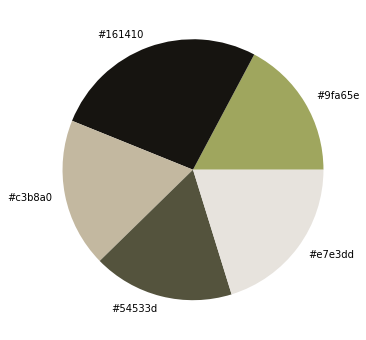

In [29]:
%%time
image = get_image('MicrosoftTeams-image (5).png')
get_colors(modify_image(image), 5)

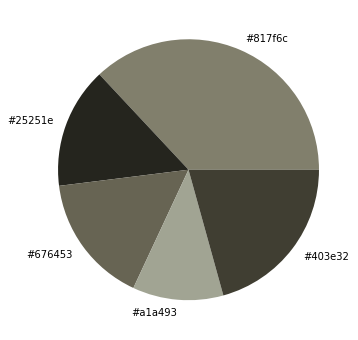

In [32]:
image = get_image('MicrosoftTeams-image (5).png')
get_colors(modify_image(image), 5)

# get_colors(get_image('MicrosoftTeams-image (5).png'), 5)

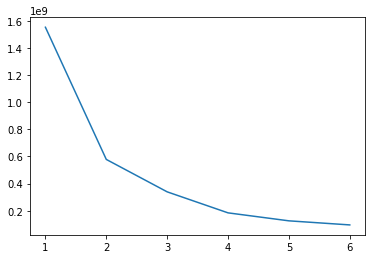

In [13]:
# def random_func(image, k_range):
#     modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
#     modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

#     sse = []
#     for k in k_range:
#         km = KMeans(n_clusters = k)
#         km.fit(modified_image)
#         sse.append(km.inertia_)
#     return sse
# k_range = range(1, 7)
# sse = random_func(get_image('MicrosoftTeams-image (4).png'), k_range)
# plt.plot(k_range, sse)

In [7]:
IMAGE_DIRECTORY = 'testPictures'
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

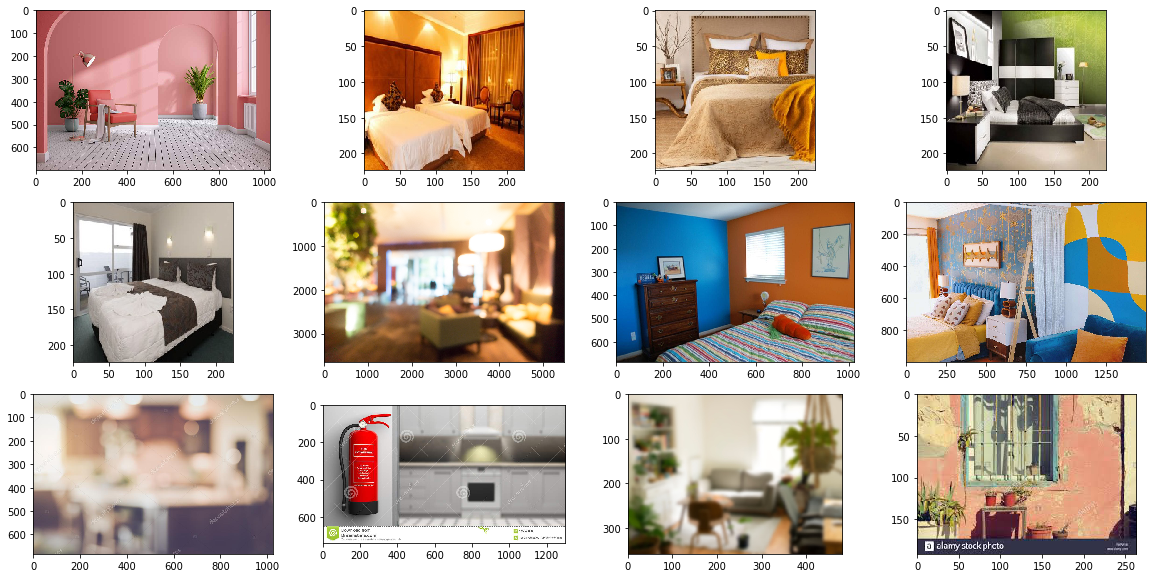

In [8]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(3, len(images)//3, i+1)
    plt.imshow(images[i])

Wall time: 1.49 s
Wall time: 1.38 s
Wall time: 1.83 s
Wall time: 1.68 s
Wall time: 1.28 s
Wall time: 2.68 s
Wall time: 996 ms
Wall time: 958 ms
Wall time: 1.38 s
Wall time: 841 ms
Wall time: 1.27 s
Wall time: 1.57 s


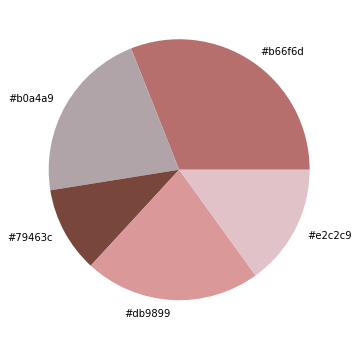

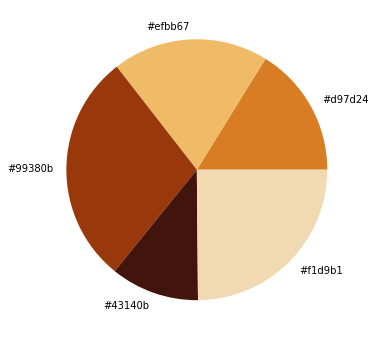

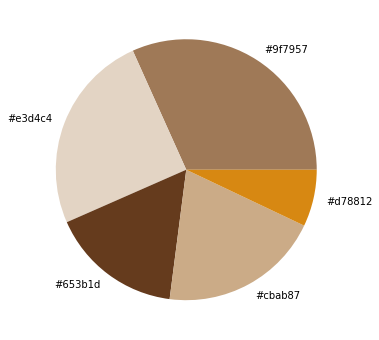

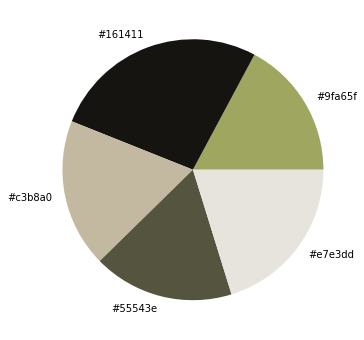

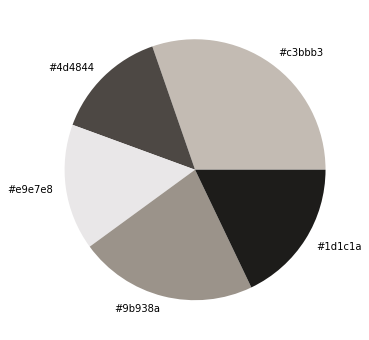

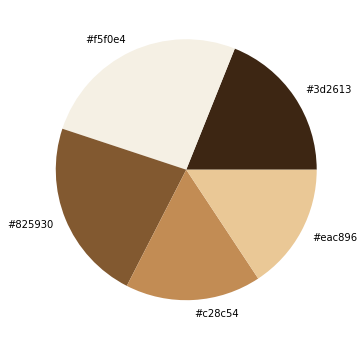

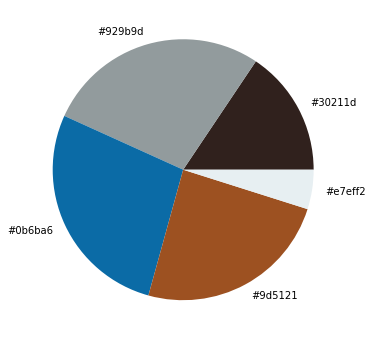

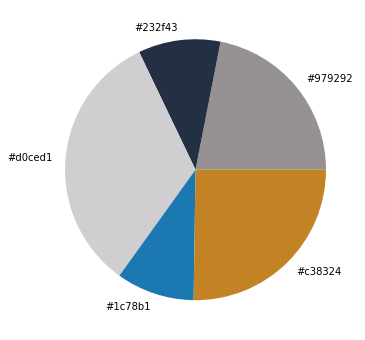

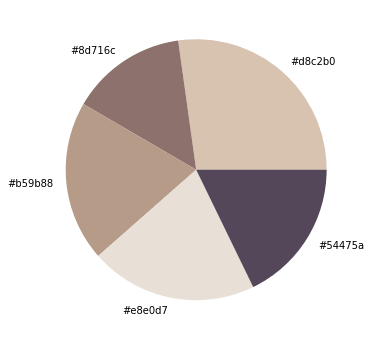

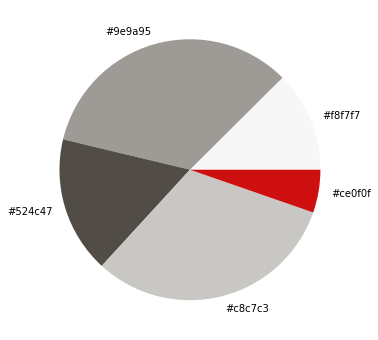

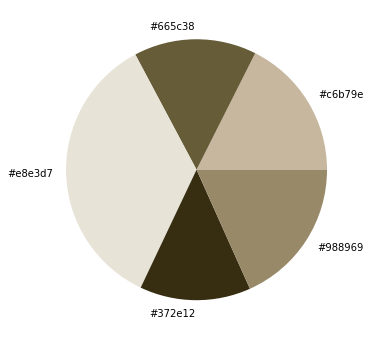

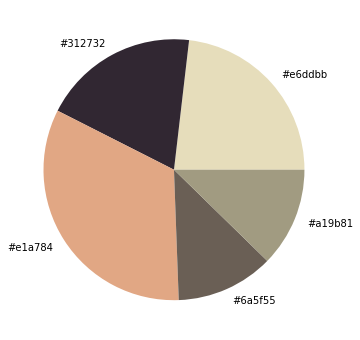

In [11]:
for i in range(len(images)): 
    %time get_colors(modify_image(images[i]), 5)